# OptimizaciÃ³n de Parametros.

# Entrenar el modelo con keras y tensorflow

1. **Cargue las librerias que necesite:numpy, matplotlib.pyplot,etc.**


2. **Para cargar las librerias utilice  import seguido del nombre de la libreria y de un alias (as).Ejemplo import pandas as pd**


3.   **Ejecute de forma secuencial de arriba hacia abajo las celdas de cÃ³digo dando click al boton play o ctrl+enter**
   
4. **Al ejecutar la celda debe marcar un check en color verde al lado izquierdo de la celda de cÃ³digo y en el menu de google colab en la parte superior derecha, se debe activar Ram y Disco con un check verde.**


5. **El simbolo # es para comentarios dentro del cÃ³digo.**

6. **Para subir un archivo a google colab se puede hacer click en la parte izquierda, donde aparace una carpeta y le da click al simbolo de una hoja con la flecha hacia arriba cargar archivo al almacenamiento de sesiÃ³n.** 

Mnist un conjunto que esta dentro de keras.

Conjunto de nÃºmeros escritos a mano digitalizados.

Los nÃºmeros son:0,1,2,3,4,5,6,7,8,9

En total son 10 nÃºmeros.

Estos nÃºmeros estan en un dataset en keras.

Cada imagen tiene 28 x 28 pÃ­xeles cuadrados (784 pÃ­xeles en total por cada imÃ¡gen). Se utiliza una divisiÃ³n  del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imÃ¡genes para formar un modelo(training) y un conjunto separado de 10.000 imÃ¡genes para probarlo(test)

**Para guardar el modelo se instala la libreria h5py**

In [ ]:
pip install h5py

**Observemos las imÃ¡genes de los numeros en escala de grises**


1.   x_train:entrada de la red neuronal(entrenar la red)
2.   y_train:salida de la red neuronal(entrenar la red)
3. x_test:entrada de prueba del red neuronal(probrando la red neuronal)
4. y_test:salida de prueba de la red neuronal(probrando la red neuronal)
5. mnist.load_data():Carga los nÃºmeros



Para graficar los nÃºmeros.

* Se puede escribir subplot(224) Ã³ subplot(2,2,4)
* Especifica num_filas, num_columnas, numplot



11501568/11490434 [==============================] - 0s 0us/step


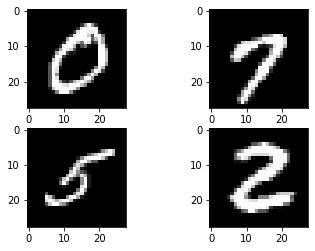

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# cargar (descargar si es necesario) el conjunto de datos MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# plot 4 imagenes en escala de grises
plt.subplot(2,2,1)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,2)
plt.imshow(x_train[15], cmap=plt.get_cmap('gray'))
plt.subplot(2,2,3)
plt.imshow(x_train[35], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[25], cmap=plt.get_cmap('gray'))
# Muestra el grÃ¡fico de los 4 numeros
plt.show()

In [2]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
 
# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)(salida)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0 #(se divide por 255 pixeles,para tener numeros entre 0 y 1)
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato por categorias (10 debibo a los numeros 0,1,2..9)
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
 
# Cree un modelo, ingrese 784 neuronas y genere 10 neuronas
# la activacion softmax es para dar la probabilidad del numero 
model = Sequential([
        Dense(units=10,input_dim=784,bias_initializer='one',activation='softmax')
    ])
 
# Definir optimizador sgd (stochastic gradient descent),  lr( learning rate) o (tasa de aprendizaje =.02)
sgd = SGD(lr=0.2) # varie este valor
 
# Definir optimizador, funciÃ³n de pÃ©rdida, precisiÃ³n de cÃ¡lculo durante el entrenamiento
model.compile(
    optimizer = sgd,
    loss = 'mse',# funcion de perdida mse(error cuadratico media)
    metrics=['accuracy'],# metrica, efectividad del modelo
)
 
#  Entrenamiento del modelo
# batch_size= Es el numero de datos que tiene cada iteraciÃ³n 
#de un ciclo (epoch), esto es util porquÃ© la red 
#neuronal actualiza los parametros W (pesos)


# epochs=Este es el nÃºmero de veces que se ejecutaran los algoritmos de forwardpropagation y backpropagation. 
#En cada ciclo (epoch) todos los datos de entrenamiento pasan por la red neuronal
# para que esta aprenda sobre ellos, si existen 10 ciclos y 1000 datos, 
# en cada ciclo los 1000 datos pasaran por la red neuronal

model.fit(x_train,y_train,batch_size=64,epochs=5)
 
#  EvaluaciÃ³n del modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)
# Guardar el modelo con extension .h5
model.save('modeloinicial.h5')# pip install h5py

x_shape: (60000, 28, 28)
y_shape: (60000,)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
938/938 [==============================] - 2s 1ms/step - loss: 0.0502 - accuracy: 0.6878
Epoch 2/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0257 - accuracy: 0.8588
Epoch 3/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0213 - accuracy: 0.8775
Epoch 4/5
938/938 [==============================] - 1s 1ms/step - loss: 0.0193 - accuracy: 0.8859
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0167 - accuracy: 0.9001

test loss 0.016736574470996857
accuracy 0.9000999927520752


In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000, 10)

**Cargar el modeloinicial.h5**

In [3]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
# Cargar datos
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# (60000,28,28)
print('x_shape:',x_train.shape)
# (60000)
print('y_shape:',y_train.shape)
# (60000,28,28)->(60000,784)
x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0
# Cambiar a un formato de categorias son 10 (el numero total de nÃºmeros)
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test,num_classes=10)
 
# Carga el modelo.
model = load_model('modeloinicial.h5')
 
# Evaluar el modelo.
loss,accuracy = model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)
 
# Modelo de entrenamiento,ajustar el modelo
model.fit(x_train,y_train,batch_size=64,epochs=2)
 
# Modelo de evaluaciÃ³n
loss,accuracy = model.evaluate(x_test,y_test)
 
print('\ntest loss',loss)
print('accuracy',accuracy)
 
# Guardar parÃ¡metros, cargar parÃ¡metros(pesos)
model.save_weights('model_pesos.h5')
model.load_weights('model_pesos.h5')
# Guardar la estructura de la red, cargar la estructura de red
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)
 
print(json_string)

x_shape: (60000, 28, 28)
y_shape: (60000,)
313/313 [==============================] - 0s 952us/step - loss: 0.0167 - accuracy: 0.9001

test loss 0.016736574470996857
accuracy 0.9000999927520752
Epoch 1/2
938/938 [==============================] - 1s 1ms/step - loss: 0.0173 - accuracy: 0.8957
Epoch 2/2
313/313 [==============================] - 0s 1ms/step - loss: 0.0155 - accuracy: 0.9061

test loss 0.015545634552836418
accuracy 0.9060999751091003
{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 784], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 784], "dtype": "float32", "units": 10, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Ones", "config": {}}, "k

**Imprimir las capas del modelo de red neuronal**

In [4]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


Para hacer la prediccion de la imagen , la probabilidad debe sumar 1.

In [10]:

prediccion = model.predict(x_test)

In [12]:
prediccion[1]

array([0.08703849, 0.02751966, 0.13814485, 0.11133784, 0.21279202,
       0.07633734, 0.09467182, 0.08971225, 0.09756819, 0.0648775 ],
      dtype=float32)

In [13]:
prediccion[0]

array([0.06925007, 0.06983136, 0.15717739, 0.08532973, 0.14593339,
       0.11683442, 0.12002686, 0.05671936, 0.0980637 , 0.08083368],
      dtype=float32)

**La probabilidad debe sumar 1**

In [9]:
0.06925007+ 0.06983136+ 0.15717739+ 0.08532973+ 0.14593339+0.11683442+ 0.12002686+ 0.05671936+ 0.0980637 + 0.08083368

0.9999999599999999

**Cada valor corresponde a la probabilidad que sea el numero 0,1,2,3 hasta el 9.**

**Esta probabilidad sale cuando definimos el modelo de la red neuronal secuencial utilizando activation='softmax'**

# **Realice lo siguiente:**


*   Modifique el tipo de optimizador por ejemplo optimizer='adam'
*   Modifique los valores de learning rate, ejemplo lr=0.001

*   Modifique epochs,batch_size,ejemplo epochs=10, batch_size=200

*   Agregue una capa oculta al modelo con 784 neuronas.

*   Modifique Dropout, ejemplo Dropout=0.2. Esto permite excluir aleatoriamente el 20% de las neuronas en el entrenamiento para evitar el sobreajuste

*    Evalue el modelo con loss y accuracy
loss,accuracy = model.evaluate(x_test,y_test)



*   Modifique loss dentro de model.compile(), ejemplo loss='categorical_crossentropy'

*   Imprima las capas de neuronas del modelo print(model.summary())

*   Guarde el modelo model.save('modeloinicial.h5')# pip install h5py

*  Guarde los pesos del modelo mediante: model.save_weights('model_pesos.h5')



In [ ]:
# Escriba aqui el cÃ³digo que responde a lo solicitado  agregue mas celdas de cÃ³digo si lo necesita.